<a href="https://colab.research.google.com/github/thirudongr/TASK-3-Terrarism-Exploratory-Data-Analysis/blob/main/TASK_3_GlobalTerrorism_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing all the libraries required for analysis


In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Importing and observing the data

In [ ]:
data=pd.read_csv("/content/globalterrorismdb_0718dist.csv",encoding="latin1")
df=pd.DataFrame(data)
print("Data has been successfully imported")
df.head()

Data has been successfully imported


<ipython-input-6-12a329ff2d06>:1: DtypeWarning: Columns (4,31,33,60,62,76,79,94,96,114,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("/content/globalterrorismdb_0718dist.csv",encoding="latin1")


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21146 entries, 0 to 21145
Columns: 135 entries, eventid to related
dtypes: float64(58), int64(21), object(56)
memory usage: 21.8+ MB


In [ ]:
df.shape

(21146, 135)

In [ ]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
for i in df.columns:
    print(i,end=", ")

eventid, iyear, imonth, iday, approxdate, extended, resolution, country, country_txt, region, region_txt, provstate, city, latitude, longitude, specificity, vicinity, location, summary, crit1, crit2, crit3, doubtterr, alternative, alternative_txt, multiple, success, suicide, attacktype1, attacktype1_txt, attacktype2, attacktype2_txt, attacktype3, attacktype3_txt, targtype1, targtype1_txt, targsubtype1, targsubtype1_txt, corp1, target1, natlty1, natlty1_txt, targtype2, targtype2_txt, targsubtype2, targsubtype2_txt, corp2, target2, natlty2, natlty2_txt, targtype3, targtype3_txt, targsubtype3, targsubtype3_txt, corp3, target3, natlty3, natlty3_txt, gname, gsubname, gname2, gsubname2, gname3, gsubname3, motive, guncertain1, guncertain2, guncertain3, individual, nperps, nperpcap, claimed, claimmode, claimmode_txt, claim2, claimmode2, claimmode2_txt, claim3, claimmode3, claimmode3_txt, compclaim, weaptype1, weaptype1_txt, weapsubtype1, weapsubtype1_txt, weaptype2, weaptype2_txt, weapsubtype2

Cleaning the data

In [ ]:
df=df[["iyear","imonth","iday","country_txt","region_txt","provstate","city",
       "latitude","longitude","location","summary","attacktype1_txt","targtype1_txt",
       "gname","motive","weaptype1_txt","nkill","nwound","addnotes"]]
df.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,addnotes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [ ]:
df.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country",
                   "region_txt":"Region","provstate":"Province/State","city":"City",
                   "latitude":"Latitude","longitude":"Longitude","location":"Location",
                   "summary":"Summary","attacktype1_txt":"Attack Type","targtype1_txt":"Target Type",
                   "gname":"Group Name","motive":"Motive","weaptype1_txt":"Weapon Type",
                   "nkill":"Killed","nwound":"Wounded","addnotes":"Add Notes"},inplace=True)

In [ ]:
df.head()

,Year,Month,Day,Country,Region,Province/State,City,Latitude,Longitude,Location,Summary,Attack Type,Target Type,Group Name,Motive,Weapon Type,Killed,Wounded,Add Notes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21146 entries, 0 to 21145
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            21146 non-null  int64  
 1   Month           21146 non-null  int64  
 2   Day             21146 non-null  int64  
 3   Country         21146 non-null  object 
 4   Region          21146 non-null  object 
 5   Province/State  21051 non-null  object 
 6   City            21146 non-null  object 
 7   Latitude        20238 non-null  float64
 8   Longitude       20238 non-null  float64
 9   Location        616 non-null    object 
 10  Summary         978 non-null    object 
 11  Attack Type     21146 non-null  object 
 12  Target Type     21146 non-null  object 
 13  Group Name      21146 non-null  object 
 14  Motive          709 non-null    object 
 15  Weapon Type     21146 non-null  object 
 16  Killed          17041 non-null  float64
 17  Wounded         15420 non-null 

In [ ]:
df.shape

(21146, 19)

In [ ]:
df.isnull().sum()

Year                  0
Month                 0
Day                   0
Country               0
Region                0
Province/State       95
City                  0
Latitude            908
Longitude           908
Location          20530
Summary           20168
Attack Type           0
Target Type           0
Group Name            0
Motive            20437
Weapon Type           0
Killed             4105
Wounded            5726
Add Notes         20426
dtype: int64

In [ ]:
df["Killed"]=df["Killed"].fillna(0)
df["Wounded"]=df["Wounded"].fillna(0)
df["Casualty"]=df["Killed"]+df["Wounded"]

In [ ]:
df.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded,Casualty
count,21146.000000,21146.000000,21146.000000,20238.000000,2.023800e+04,21146.000000,21146.000000,21146.000000
mean,1979.026435,6.281708,15.185047,24.898481,-4.290513e+03,1.556701,1.078455,2.635156
std,3.542067,3.478263,8.951616,23.173912,6.058321e+05,8.062028,8.818312,12.989605
min,1970.000000,0.000000,0.000000,-51.692214,-8.618590e+07,0.000000,0.000000,0.000000
25%,1977.000000,3.000000,7.000000,13.595253,-8.626701e+01,0.000000,0.000000,0.000000
50%,1980.000000,6.000000,15.000000,32.010941,-7.649053e+00,0.000000,0.000000,0.000000
75%,1982.000000,9.000000,23.000000,42.815372,9.174508e+00,1.000000,0.000000,1.000000
max,1986.000000,12.000000,31.000000,64.837778,1.726362e+02,422.000000,700.000000,760.000000


Observation
The data consists of terrorist activities ranging from the year: 1970 to 2017
Maximum number of people killed in an event were: 1570
Maximum number of people wounded in an event were: 8191
Maximum number of total casualties in an event were: 9574





Visualizing the data
1. Year wise Attacks
      1.Number of Attacks in each Year

In [ ]:
attacks=df["Year"].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={"index":"Year","Year":"Attacks"}).set_index("Year")
attacks.head()

,Attacks
Year,
1970,651
1971,471
1972,568
1973,473
1974,581


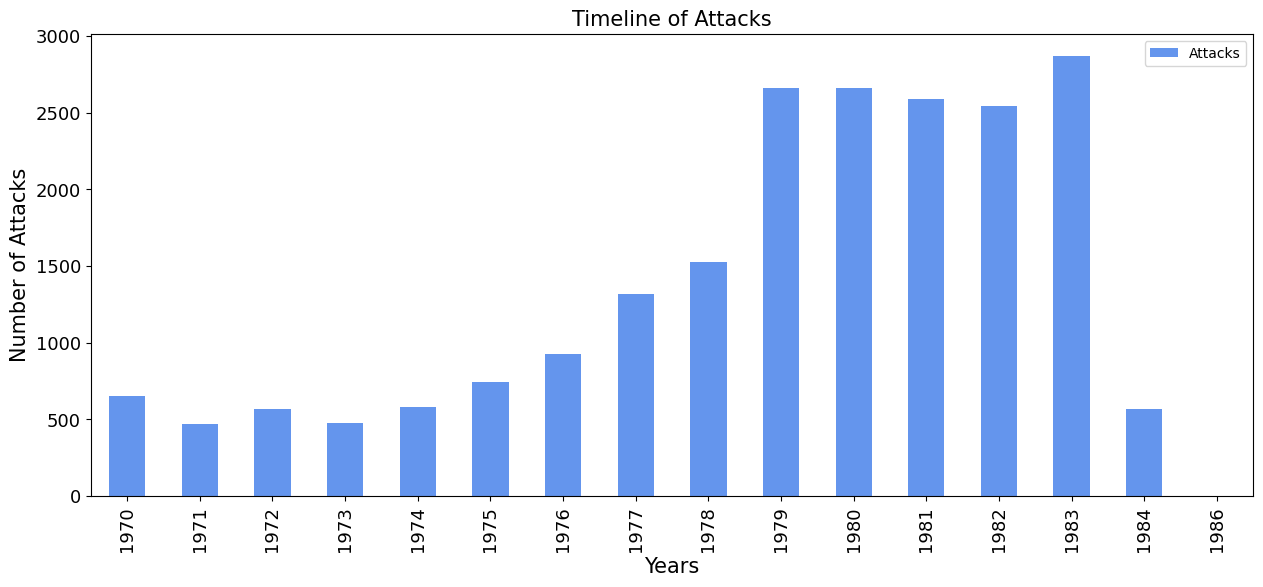

In [ ]:
attacks.plot(kind="bar",color="cornflowerblue",figsize=(15,6),fontsize=13)
plt.title("Timeline of Attacks",fontsize=15)
plt.xlabel("Years",fontsize=15)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()

(i). Most number of attacks(16903) in 2014
(ii). Least number of attacks(471) in 1971

2.Total Casualties (Killed + Wounded) in each Year

In [ ]:
yc=df[["Year","Casualty"]].groupby("Year").sum()
yc.head()

,Casualty
Year,
1970,386.0
1971,255.0
1972,975.0
1973,865.0
1974,1404.0


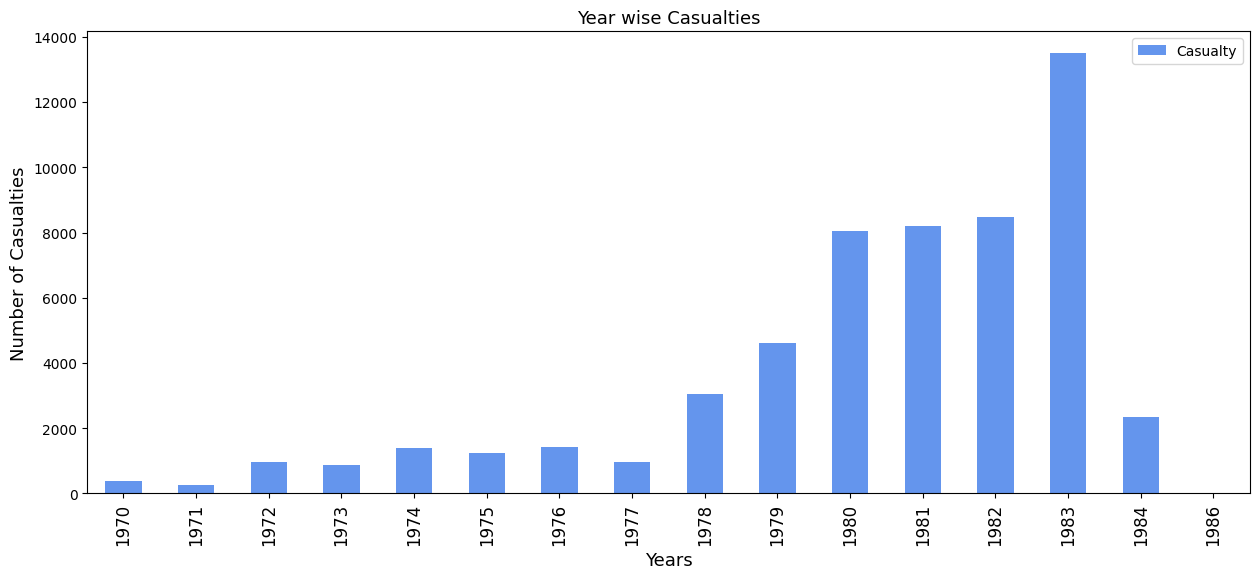

In [ ]:
yc.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Year wise Casualties",fontsize=13)
plt.xlabel("Years",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

3.Killed in each Year

In [ ]:
yk=df[["Year","Killed"]].groupby("Year").sum()
yk.head()

,Killed
Year,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0


3.Wounded in each Region

In [ ]:
yw=df[["Year","Wounded"]].groupby("Year").sum()
yw.head()

,Wounded
Year,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


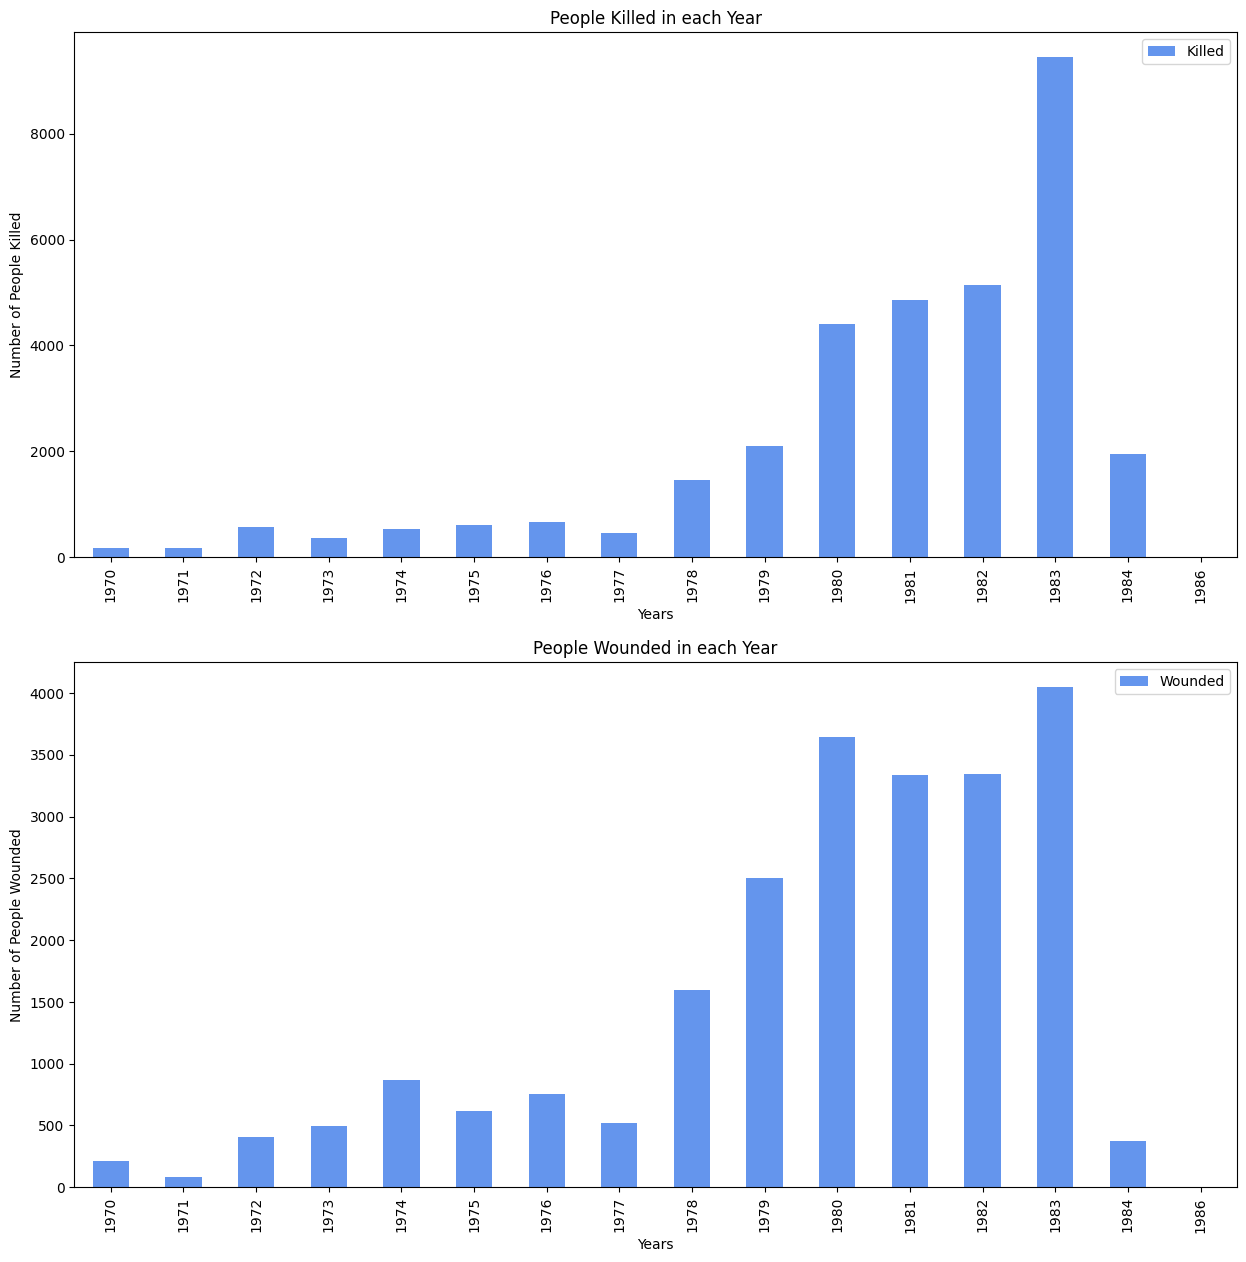

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(2,1,1)
ax1=fig.add_subplot(2,1,2)

#Killed
yk.plot(kind="bar",color="cornflowerblue",figsize=(15,15),ax=ax0)
ax0.set_title("People Killed in each Year")
ax0.set_xlabel("Years")
ax0.set_ylabel("Number of People Killed")

#Wounded
yw.plot(kind="bar",color="cornflowerblue",figsize=(15,15),ax=ax1)
ax1.set_title("People Wounded in each Year")
ax1.set_xlabel("Years")
ax1.set_ylabel("Number of People Wounded")

plt.show()


2.Region wise Attacks